# Neuralworks

## Data Scientist Challenge - LATAM Airlines

### Rodrigo González Kusnir

In [2]:
#Importamos librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt

#Ajustamos algunos parámetros de sns generales 
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [74]:
#Carga y lectura del dataset

df = pd.read_csv("dataset_SCL.csv", sep=",", error_bad_lines=False, index_col=False, dtype='unicode')
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [66]:
#Información de las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  object
 11  MES        68206 non-null  object
 12  AÑO        68206 non-null  object
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: object(18)
memory usage: 9.4+ MB


In [67]:
#Cheuqeamos valores NA

df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [77]:
#Quitamos los NA

df = df.dropna(how='all') 

#### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [81]:
#Total Vuelos

n_vuelos = str(len(df))
n_vuelos 

'68206'

In [9]:
#Descripción del dataset

df.describe(datetime_is_numeric=True, include='all')

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205
unique,53252,584,1,64,30,62774,861,1,63,32,31,12,2,7,2,23,1,62
top,2017-03-26 18:00:00,174,SCEL,SCFA,LAN,2017-05-19 07:01:00,174,SCEL,SCFA,LAN,20,12,2017,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68205,5787,37611,5,649,68205,5786,20988,2290,6356,68203,10292,36966,40892,68205,6335


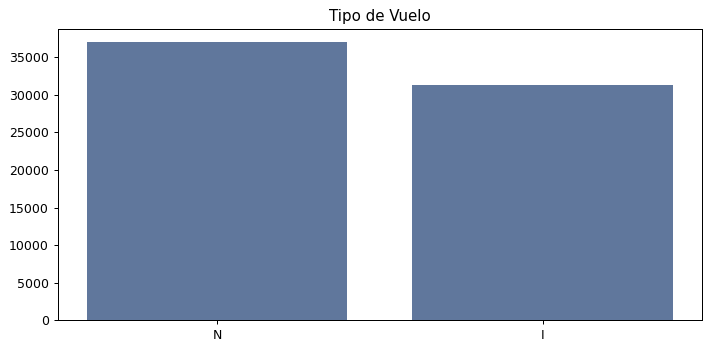

In [106]:
#Gráfica por tipo de Vuelo

plt.figure(figsize=(8,4), dpi=90)
plt.bar(df['TIPOVUELO'].value_counts().reset_index()["index"], df['TIPOVUELO'].value_counts().reset_index()["TIPOVUELO"])
plt.title("Tipo de Vuelo")
plt.tight_layout()
plt.show()


In [17]:
#Valores que toma la variable SIGLADES o Ciudad de Destino

print(df['SIGLADES'].unique())

['Miami' 'Dallas' 'Buenos Aires' 'Toronto' 'Paris' 'Ciudad de Mexico'
 'Bogota' 'Roma' 'Londres' 'Ciudad de Panama' 'Atlanta' 'Sao Paulo'
 'Rio de Janeiro' 'Florianapolis' 'Madrid' 'Lima' 'Sydney' 'Houston'
 'Asuncion' 'Cataratas Iguacu' 'Puerto Montt' 'Punta Arenas'
 'Puerto Natales' 'Balmaceda' 'Temuco' 'Valdivia' 'Concepcion' 'La Serena'
 'Copiapo' 'Calama' 'Antofagasta' 'Iquique' 'Arica' 'Mendoza' 'Cordoba'
 'Montevideo' 'Castro (Chiloe)' 'Osorno' 'Orlando' 'Nueva York'
 'Guayaquil' 'Cancun' 'Punta Cana' 'Los Angeles' 'Auckland N.Z.'
 'Isla de Pascua' 'La Paz' 'Santa Cruz' 'Curitiba, Bra.' 'Quito'
 'Bariloche' 'Rosario' 'Washington' 'Tucuman' 'Melbourne' 'San Juan, Arg.'
 'Neuquen' 'Pisco, Peru' 'Ushuia' 'Puerto Stanley' 'Punta del Este'
 'Cochabamba']


<AxesSubplot:title={'center':'Ciudad de Destino'}>

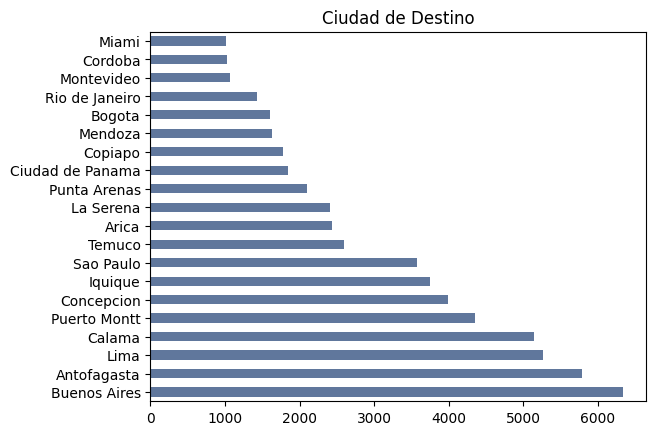

In [49]:
#Gráfica por nombre ciudad de destino para las 20 ciudades con mayor cantidad de vuelos

plot_sdes = df['SIGLADES'].value_counts()[:20].plot(kind='barh', title='Ciudad de Destino')
plot_sdes

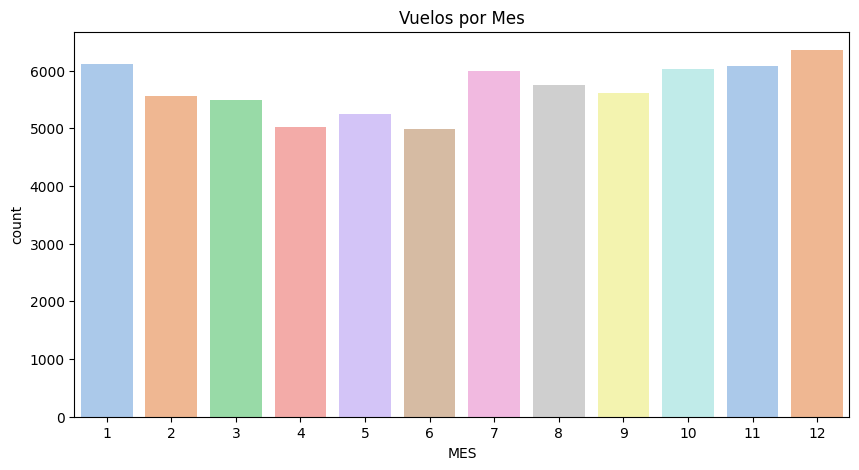

In [148]:
#Gráfica de Vuelos por Mes
#OBS: Dado que la data comprende casi toda la data de 2017 (-2 obs que no), utilizamos la variable mes para identificar como distribuyen

plt.figure(figsize=(10,5))
sns.countplot(data=df, x=df['MES'], palette="pastel")
plt.title("Vuelos por Mes")
plt.xticks(rotation=0)
plt.show()


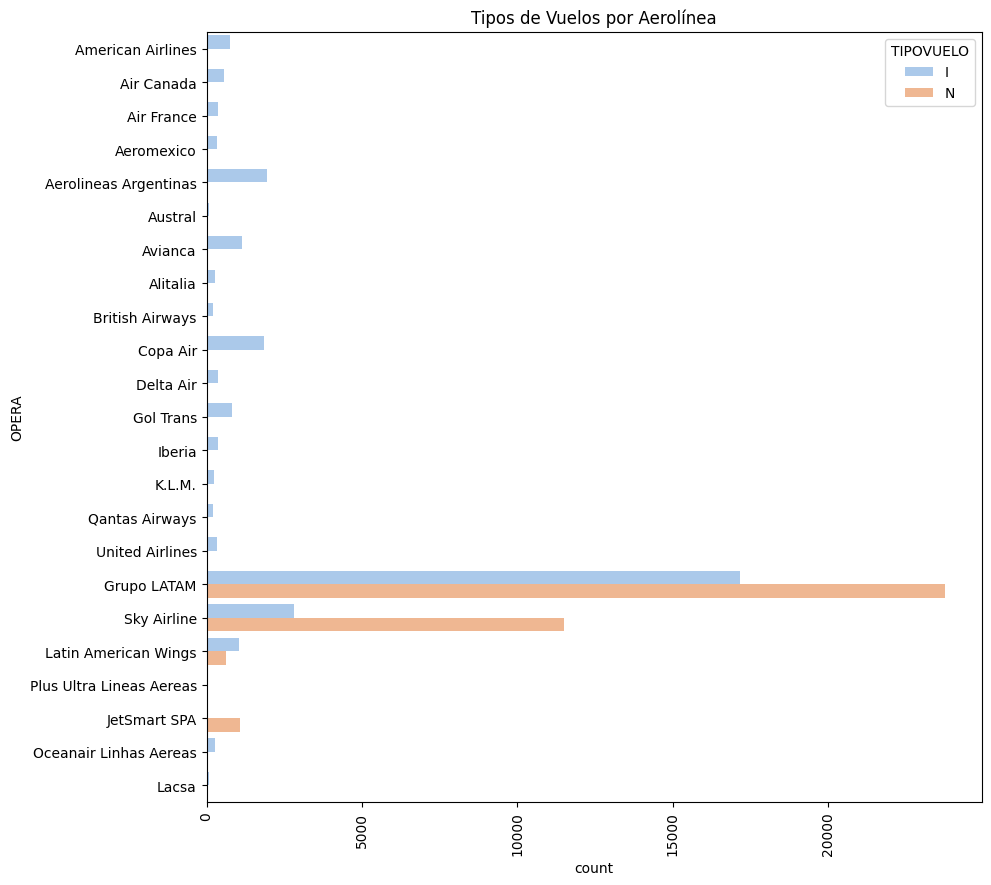

In [149]:
#Gráfica de Vuelos por aerolínea

plt.figure(figsize=(10,10))
sns.countplot(data=df, y=df['OPERA'], hue=df['TIPOVUELO'], palette="pastel")
plt.title("Tipos de Vuelos por Aerolínea")
plt.xticks(rotation=90)
plt.show()

#### 1. R: Con un tabulado simple podemos notar que la mayor cantidad de vuelos se realizaron durante el mes de diciembre (6356); Que el viernes es día con mayor cantidad de operaciones (10292); Que principalmente se concentra en vuelos nacionales ~37000; y que a pesar de esto, el destino favorito es Buenos Aires (6335). Por último cuando observamos los tipos de vuelos por aerolínea notamos que Grupo LATAM lídera la gráfica tanto a nivel nacional como internacional.

#### 2. 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv : 
- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I.
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.

In [25]:
df["Fecha-I"]

0        2017-01-01 23:30:00
1        2017-01-02 23:30:00
2        2017-01-03 23:30:00
3        2017-01-04 23:30:00
4        2017-01-05 23:30:00
                ...         
68201    2017-12-22 14:55:00
68202    2017-12-25 14:55:00
68203    2017-12-27 14:55:00
68204    2017-12-29 14:55:00
68205    2017-12-31 14:55:00
Name: Fecha-I, Length: 68206, dtype: object

In [110]:
#A. Calculamos la temporada_alta

# 'Fecha-I-Date': Será la variable Fecha-I sin el tiempo de la forma día-mes
# temporada_alta: 15-Dic y 3-Mar
# temporada_alta: 15-Jul y 31-Jul
# temporada_alta: 11-Sep y 30-Sep

df["Fecha-I-Date"] = pd.to_datetime(df["Fecha-I"], format='%Y-%m-%d').dt.strftime('%d-%m')
df['temporada_alta'] = "NA"

for i in range(0, len(df["Fecha-I-Date"])):
    if "15-12" <= df["Fecha-I-Date"][i] <= "31-12":
        df['temporada_alta'][i] = 1
    elif "01-01" <= df["Fecha-I-Date"][i] <= "03-03":
        df['temporada_alta'][i] = 1
    elif "15-07" <= df["Fecha-I-Date"][i] <= "31-07":
        df['temporada_alta'][i] = 1    
    elif "11-09" <= df["Fecha-I-Date"][i] <= "30-09":
        df['temporada_alta'][i] = 1
    else:
        df['temporada_alta'][i] = 0

df['temporada_alta'].value_counts()

1    49352
0    18854
Name: temporada_alta, dtype: int64

In [111]:
#B. Calculamos la diferencia en minutos
# Diferencia en minutos entre Fecha-O y Fecha-I.
# 'Fecha-I-O-Diff' capturará la diferencia en minutos

df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])
df['Fecha-I-O-Diff'] = df['Fecha-O'] - df['Fecha-I']
df['Fecha-I-O-Diff'] = df['Fecha-I-O-Diff'].dt.total_seconds()/60

df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Fecha-I-Date,temporada_alta,Fecha-I-O-Diff
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,01-01,1,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,02-01,1,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,03-01,1,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,04-01,0,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,05-01,0,-2.0


In [113]:
#C. Calculamos los atrasos
# 'atraso_15: 1 si dif_min > 15, 0 si no

df['atraso_15'] = "NA"

for i in range(0, len(df['Fecha-I-O-Diff'])):
    if df['Fecha-I-O-Diff'][i] > 15.0:
        df['atraso_15'][i] = 1
    else:
        df['atraso_15'][i] = 0
             
df['atraso_15'].value_counts()


C:\Users\rodgo\AppData\Local\Temp\ipykernel_15388\207000186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atraso_15'][i] = 0
C:\Users\rodgo\AppData\Local\Temp\ipykernel_15388\207000186.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['atraso_15'][i] = 1


0    55592
1    12614
Name: atraso_15, dtype: int64

In [114]:
#D. Calculamos el periodo del día en base a Fecha-I
# mañana (entre 5:00 y 11:59)
# tarde (entre 12:00 y 18:59) 
# noche (entre 19:00 y 4:59)

df["Fecha-I-Hora"] = df['Fecha-I'].dt.strftime('%H:%M')
df['periodo_dia'] = "NA"

for i in range(0, len(df["Fecha-I-Hora"])):
    if "05:00" <= df["Fecha-I-Hora"][i] <= "11:59":
        df['periodo_dia'][i] = "mañana"
    elif "12:00" <= df["Fecha-I-Hora"][i] <= "18:59":
        df['periodo_dia'][i] = "tarde"     
    else:
        df['periodo_dia'][i] = "noche"  
        
df['periodo_dia'].value_counts()


C:\Users\rodgo\AppData\Local\Temp\ipykernel_15388\704835437.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['periodo_dia'][i] = "noche"
C:\Users\rodgo\AppData\Local\Temp\ipykernel_15388\704835437.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['periodo_dia'][i] = "tarde"
C:\Users\rodgo\AppData\Local\Temp\ipykernel_15388\704835437.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['periodo_dia'][i] = "mañana"


tarde     25506
mañana    25352
noche     17348
Name: periodo_dia, dtype: int64

In [118]:
#Creamos un dataframe con las columnas calculadas para exportarlos en un archivo synthetic_features.csv
# df.columns.tolist()
# 'temporada_alta', 'Fecha-I-O-Diff', 'atraso_15', 'periodo_dia' 

synthetic_features = pd.DataFrame(df, columns=['temporada_alta', 'Fecha-I-O-Diff', 'atraso_15', 'periodo_dia'])
#synthetic_features.head()

synthetic_features.to_csv('synthetic_features.csv')


#### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [309]:
#Calculamos la tasa de atrasos total del dataset
#recordar que n_vuelos era el total de vuelos
atrasos = int(len(df[df['atraso_15']==1]))
n_vuelos = int(n_vuelos)
tasa_atrasos = int(round(atrasos/n_vuelos*100, 0))
print("Tasa de atrasos total del dataset:", tasa_atrasos,"%")



Tasa de atrasos total del dataset: 18 %


<AxesSubplot:title={'center':'Tasas de atrasos por ciudad de destino'}>

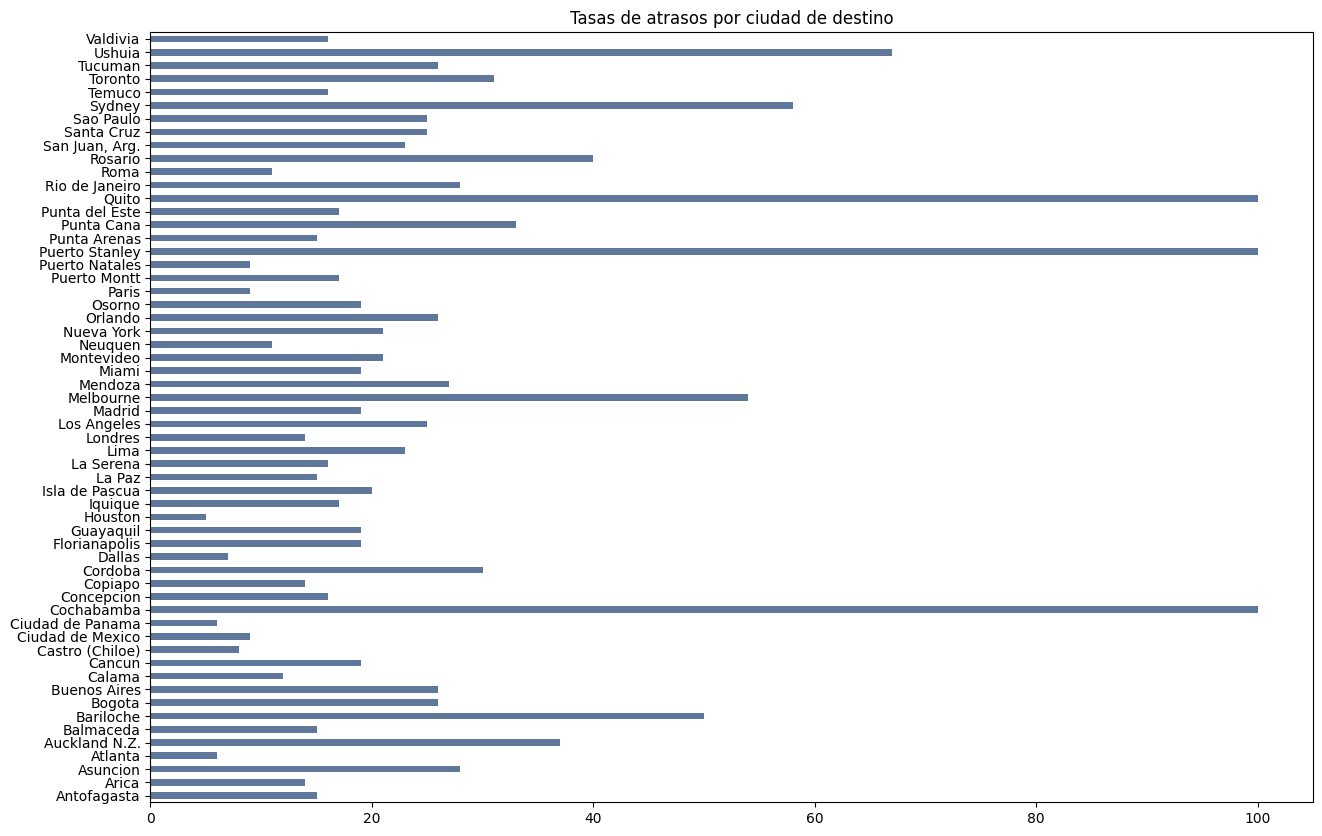

In [297]:
df_atrasos = df.query("atraso_15 == 1")
#Cálculo tasa de atrasos por lugar de destino
atrasos_siglades = round((df_atrasos['SIGLADES'].value_counts() / df['SIGLADES'].value_counts())*100, 0)
atrasos_siglades = pd.DataFrame(atrasos_siglades)
atrasos_siglades.dropna(inplace=True)
atrasos_siglades.plot(kind="barh", title = "Tasas de atrasos por ciudad de destino", figsize = (15, 10), legend=False)

<AxesSubplot:title={'center':'Tasas de atrasos por aerolínea que opera'}>

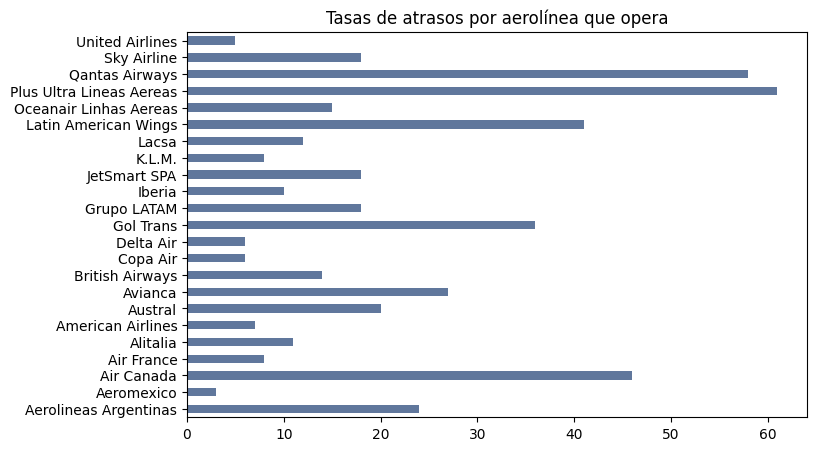

In [296]:
#Cálculo tasa de atrasos por aerolínea que opera
atrasos_opera = round((df_atrasos['OPERA'].value_counts() / df['OPERA'].value_counts())*100, 0)
atrasos_opera = pd.DataFrame(atrasos_opera)
atrasos_opera.dropna(inplace=True)
atrasos_opera.plot(kind="barh", title = "Tasas de atrasos por aerolínea que opera", figsize = (8, 5), legend=False)


<AxesSubplot:title={'center':'Tasas de atrasos por mes'}>

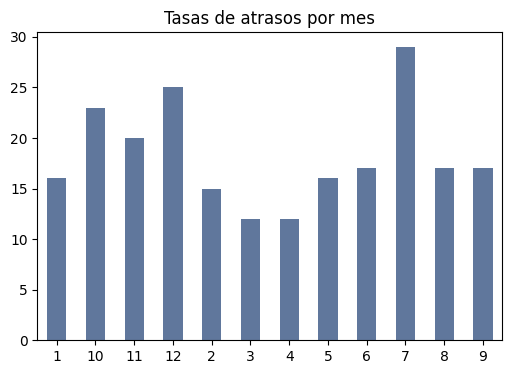

In [311]:
#Cálculo tasa de atrasos por mes del año
atrasos_mes = round((df_atrasos['MES'].value_counts() / df['MES'].value_counts())*100, 0)
atrasos_mes = pd.DataFrame(atrasos_mes)
atrasos_mes.dropna(inplace=True)
atrasos_mes.plot(kind="bar", title = "Tasas de atrasos por mes", figsize = (6, 4), rot=0, legend= False)


<AxesSubplot:title={'center':'Tasas de atrasos por día de la semana'}>

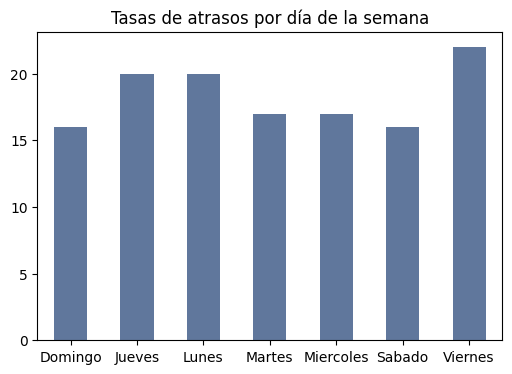

In [313]:
#Cálculo tasa de atraso por día de la semana
atrasos_dia = round((df_atrasos['DIANOM'].value_counts() / df['DIANOM'].value_counts())*100, 0)
atrasos_dia = pd.DataFrame(atrasos_dia)
atrasos_dia.dropna(inplace=True)
atrasos_dia.plot(kind="bar", title = "Tasas de atrasos por día de la semana", figsize = (6, 4), rot=0, legend= False)

<AxesSubplot:title={'center':'Tasas de atrasos por temporada'}>

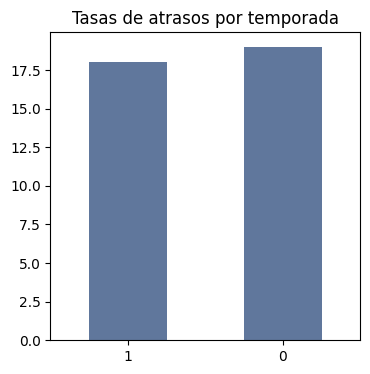

In [308]:
#Cálculo tasa de atraso por temporada
# 1 = Temporada Alta
# 0 = Temporada Baja
atrasos_temporada = round((df_atrasos['temporada_alta'].value_counts() / df['temporada_alta'].value_counts())*100, 0)
atrasos_temporada = pd.DataFrame(atrasos_temporada)
atrasos_temporada.dropna(inplace=True)
atrasos_temporada.plot(kind="bar", title = "Tasas de atrasos por temporada", figsize = (4, 4), rot=0, legend=False)

<AxesSubplot:title={'center':'Tasas de atrasos por tipo de vuelo'}>

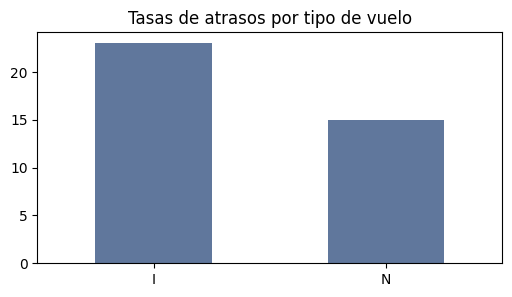

In [298]:
#Cálculo tasa de atraso por tipo de vuelo
# I = Vuelo Internacional
# N = Vuelo Nacional
atrasos_vuelo = round((df_atrasos['TIPOVUELO'].value_counts() / df['TIPOVUELO'].value_counts())*100, 0)
atrasos_vuelo = pd.DataFrame(atrasos_vuelo)
atrasos_vuelo.dropna(inplace=True)
atrasos_vuelo.plot(kind="bar", title = "Tasas de atrasos por tipo de vuelo", figsize = (6, 3), rot=0, legend=False)

#### 3.R: Esperaría que variables como la ciudad de origen/destino, la aerolínea que opera, el tipo de vuelo, y el mes del vuelo fuesen los principales predictores de atrasos. En ese sentido pondría atención a la interacción de las aerlíneas con los aeropuertos dado que podría ser un determinante interesante a inspeccionar.

#### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

#### 4.1. Preparamos la data

In [317]:
#Checkeamos missing data
df.isnull().values.any() 
df.isnull().sum()

Fecha-I           0
Vlo-I             0
Ori-I             0
Des-I             0
Emp-I             0
Fecha-O           0
Vlo-O             1
Ori-O             0
Des-O             0
Emp-O             0
DIA               0
MES               0
AÑO               0
DIANOM            0
TIPOVUELO         0
OPERA             0
SIGLAORI          0
SIGLADES          0
Fecha-I-Date      0
temporada_alta    0
Fecha-I-O-Diff    0
atraso_15         0
Fecha-I-Hora      0
periodo_dia       0
dtype: int64

In [319]:
#Limpiamos missing data
df = df.dropna()
df.isnull().sum()

Fecha-I           0
Vlo-I             0
Ori-I             0
Des-I             0
Emp-I             0
Fecha-O           0
Vlo-O             0
Ori-O             0
Des-O             0
Emp-O             0
DIA               0
MES               0
AÑO               0
DIANOM            0
TIPOVUELO         0
OPERA             0
SIGLAORI          0
SIGLADES          0
Fecha-I-Date      0
temporada_alta    0
Fecha-I-O-Diff    0
atraso_15         0
Fecha-I-Hora      0
periodo_dia       0
dtype: int64

In [336]:
#Filtramos el dataset y mantenemos las columnas que creemos necesarias

#df.columns.tolist()
df = df[['SIGLAORI', 'SIGLADES', 'OPERA', 'MES', 'DIANOM', 'TIPOVUELO', 'atraso_15', 'periodo_dia']]

In [346]:
#Ajustamos la data no numérica

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["SIGLAORI"] = ord_enc.fit_transform(df[["SIGLAORI"]])
df["SIGLADES"] = ord_enc.fit_transform(df[["SIGLADES"]])
df["OPERA"] = ord_enc.fit_transform(df[["OPERA"]])
df["MES"] = ord_enc.fit_transform(df[["MES"]])
df["DIANOM"] = ord_enc.fit_transform(df[["DIANOM"]])
df["TIPOVUELO"] = ord_enc.fit_transform(df[["TIPOVUELO"]])
df["periodo_dia"] = ord_enc.fit_transform(df[["periodo_dia"]])
df['atraso_15'] = df['atraso_15'].astype(int)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIGLAORI     68205 non-null  float64
 1   SIGLADES     68205 non-null  float64
 2   OPERA        68205 non-null  float64
 3   MES          68205 non-null  float64
 4   DIANOM       68205 non-null  float64
 5   TIPOVUELO    68205 non-null  float64
 6   atraso_15    68205 non-null  int32  
 7   periodo_dia  68205 non-null  float64
dtypes: float64(7), int32(1)
memory usage: 4.4 MB


#### 4.2. Construimos el modelo

In [348]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df.drop('atraso_15', axis=1), df['atraso_15'], test_size=0.2, random_state=42) 

In [349]:
train_x.shape

(54564, 7)

In [350]:
test_x.shape

(13641, 7)

In [351]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13, n_estimators=100)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=13)

In [352]:
#Chequeamos el accuracy del modelo

predicted = model.predict(test_x)
model.score(test_x, test_y)

0.7975221757935635

In [353]:
# Dado que en un modelo de clasificación el accuracy no es una métrica muy confiable, miramos una mejor métrica de clasificación binaria (ROC AUC) 

from sklearn.metrics import roc_auc_score

probabilities = model.predict_proba(test_x)
roc_auc_score(test_y, probabilities[:, 1])

0.6481657183650275

In [355]:
# Para conocer más acerca del comprotamiento del modelo, miramos la matriz de confusión

from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

#True positive: 10391, Nro de vuelos que predijo que llegaron a tiempo y lo estaban
#False positive: 746, Nro de vuelos que predjo con retraso y no lo estaban
#False negative: 2016, Nro de vuelos que predijo que llegaron a tiempo y no lo estaban
#True negative: 488, Nro de vuelos que predijo con retraso y lo estaban

array([[10391,   746],
       [ 2016,   488]], dtype=int64)

In [356]:
#Chequeamos la precisión del modelo

from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.679920477137177

In [357]:
#Chequeamos el recall del modelo

from sklearn.metrics import recall_score
recall_score(train_y, train_predictions)

0.30445103857566763

#### 4.3. Visualizamos el Modelo 

Text(0, 0.5, 'Tasa de Verdaderos Positivos')

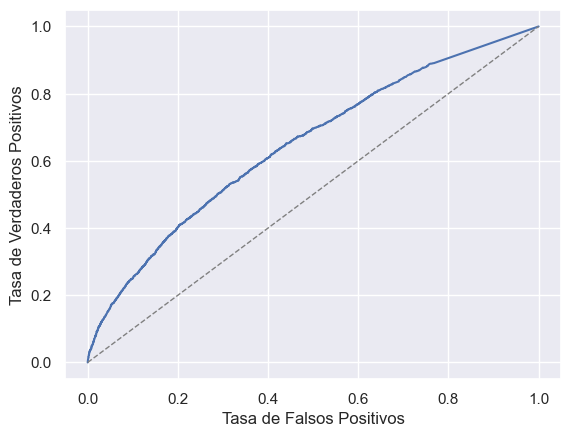

In [360]:
%matplotlib inline
sns.set()
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0,1], color='grey', lw=1, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos') # False positive
plt.ylabel('Tasa de Verdaderos Positivos') #True positive

#### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

#### 5. R: Para ser un modelo simple podríamos decir que tiene un desempeño mejor del que esperaba. Comprendiendo que las clásicas métricas de performance oscilan entre 0 y 1. Sin embargo habría que determinar de mejor manera para el negocio el trade-off entre precision y recall. El accuracy nos dice que el modelo clasifica muy bien con ~80% de los valores se encuentran bien clasificados (tanto positivos como negativos). Si vamos a una métrica más exigente como el ROC AUC, nos señala que un ~65% de estos se encuentran bien clasificados. La métrica para la precisión o calidad de la predicción, señala que del modelo un ~68% de todos los valores positivos (TP+FP) son realmente positivos (TP). El recall, tasa de verdaderos positivos o la capacidad de identificar del modelo, señala que es de un ~30%, es decir clasificaría bien 1 de cada 3 vuelos. La matriz de confusión para conocer como se comporta y como está clasificando el modelo.Escogí un RFC (RandomForestClassifier) principalmente por la naturaleza del problema a resolver, es decir: por la capacidad de seleccionar predictores de forma automática, por el contexto al ser un problema de clasificación binaria (atraso=1, a tiempo=0), porque la mayoría de las de variables categóricas que utilicé para la regresión eran categóricas, entre otros. Se podría mejorar el desempeño del modelo con la revisión de los hiperparametros, aumentando la cantidad de observaciones del dataset, probando y comparando con otros algoritmos y/o modelos de predicción.  